# Objective

**Day 14 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 14. space**

Used Datasets:

https://www.kaggle.com/csanhueza/the-marvel-universe-social-network

https://discuss.codecademy.com/t/visualize-data-with-python-orion-constellation-project/516053

# Setup

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pyvis
from pyvis.network import Network

# Plot 1

In [105]:
# Orion
x = [-0.41, 0.57, 0.07, 0.00, -0.29, -0.32,-0.50,-0.23, -0.23]
y = [4.12, 7.71, 2.36, 9.10, 13.35, 8.13, 7.19, 13.25,13.43]

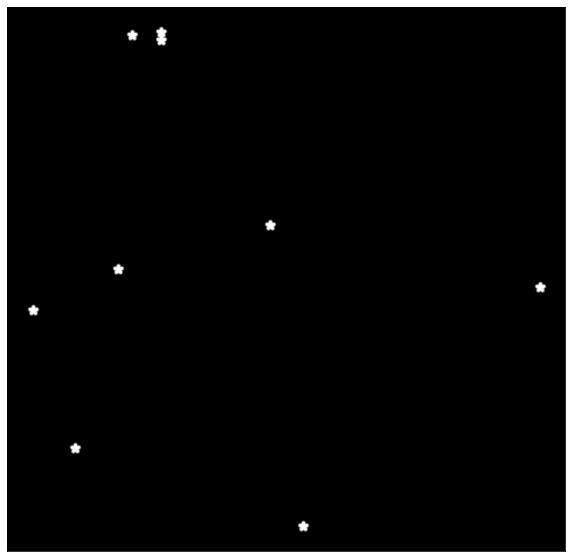

In [106]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

n_shades = 10
diff_linewidth = .4
for n in range(1, n_shades+1):
    plt.scatter(x, y, linewidth=1.5+(diff_linewidth*n), s=50, color='white', marker='*', alpha=1/n)
    
ax.set_facecolor('black')
ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
fig.savefig('../plots/day14_space_1.png', bbox_inches = 'tight')

# Plot 2

In [3]:
df_edges = pd.read_csv("../data/marvel/edges.csv")
df_nodes = pd.read_csv("../data/marvel/nodes.csv")
df_hero_network = pd.read_csv("../data/marvel/hero-network.csv")

In [4]:
df_edges.head()

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [5]:
df_nodes.head()

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [6]:
df_hero_network.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


# First Plot

In [75]:
got_net = Network(height='750px', width='100%', bgcolor='black')

# set the physics layout of the network
got_net.barnes_hut(
gravity=-80000,
central_gravity=0.3,
spring_length=250,
spring_strength=0.001,
damping=0.09,
overlap=0,
)
#got_net.barnes_hut()
sources = df_hero_network['hero1'][:45000]
targets = df_hero_network['hero2'][:45000]

edge_data = zip(sources, targets)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = 1

    got_net.add_node(src, src, title=src, color="white", shape="star", borderWidth=10, alpha=.01)
    got_net.add_node(dst, dst, title=dst, color="white", shape="star", borderWidth=8, alpha=.01)
 
    got_net.add_edge(src, dst, value=w, color="black")

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show('../plots/day14_space.html')

# Second Plot

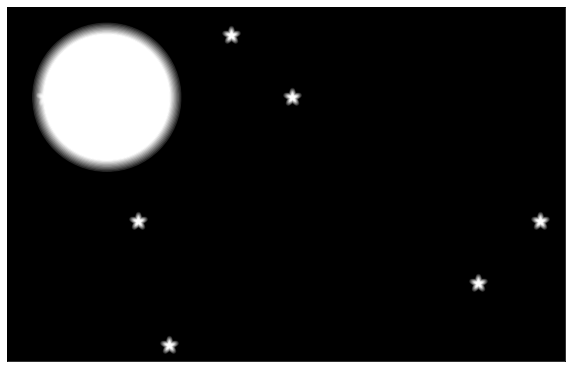

In [94]:
x = [.25, .4, .5, .3, .8, .9, .1]
y = [.5, .8, .7, .3, .4, .5, .7]

fig, ax = plt.subplots(1, 1, figsize=(10,10))

n_shades = 10
diff_linewidth = .4
for n in range(1, n_shades+1):
    circle = plt.Circle((0.2, 0.7), radius=.1+.002*n, color='white' , alpha=1/n, clip_on=False)
    ax.add_patch(circle)
    plt.scatter(x, y, linewidth=1.5+(diff_linewidth*n), s=n*20, color='white', marker='*', alpha=1/n)
    
ax.set_facecolor('black')
ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
ax.set_aspect(1)
fig.savefig('../plots/day14_space_1.png', bbox_inches = 'tight')